<a href="https://colab.research.google.com/github/MYElmasry/Classification-Logistic-Regression/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "/content/drive/MyDrive/ex2data1.txt"
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

print('data = ')
print(data.head(10) )
print('data.describe = ')
print(data.describe())

data = 
      Exam 1     Exam 2  Admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1
5  45.083277  56.316372         0
6  61.106665  96.511426         1
7  75.024746  46.554014         1
8  76.098787  87.420570         1
9  84.432820  43.533393         1
data.describe = 
           Exam 1      Exam 2    Admitted
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.179205    0.000000
50%     67.032988   67.682381    1.000000
75%     80.212529   79.360605    1.000000
max     99.827858   98.869436    1.000000


In [3]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

print(positive)
print('==========================')
print(negative)

       Exam 1     Exam 2  Admitted
3   60.182599  86.308552         1
4   79.032736  75.344376         1
6   61.106665  96.511426         1
7   75.024746  46.554014         1
8   76.098787  87.420570         1
9   84.432820  43.533393         1
12  82.307053  76.481963         1
13  69.364589  97.718692         1
15  53.971052  89.207350         1
16  69.070144  52.740470         1
18  70.661510  92.927138         1
19  76.978784  47.575964         1
21  89.676776  65.799366         1
24  77.924091  68.972360         1
25  62.271014  69.954458         1
26  80.190181  44.821629         1
30  61.379289  72.807887         1
31  85.404519  57.051984         1
33  52.045405  69.432860         1
37  64.176989  80.908061         1
40  83.902394  56.308046         1
42  94.443368  65.568922         1
46  77.193035  70.458200         1
47  97.771599  86.727822         1
48  62.073064  96.768824         1
49  91.564974  88.696293         1
50  79.944818  74.163119         1
51  99.272527  60.99

Text(0, 0.5, 'Exam 2 Score')

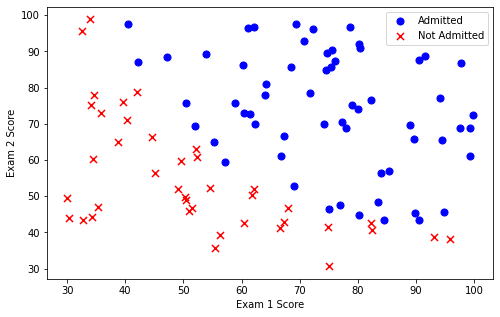

In [4]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(positive['Exam 1'],positive['Exam 2'],s=50,c='b', marker= 'o', label='Admitted')

ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

In [5]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [6]:
data.insert(0, 'ones', 1)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [7]:
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

In [8]:
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

In [9]:
thiscost = cost(theta, X, y)
print('cost = ' , thiscost)

cost =  0.6931471805599453


In [10]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    error = sigmoid(X * theta.T) - y
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    return grad

In [11]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))

costafteroptimize = cost(result[0], X, y)
print('cost after optimize = ' , costafteroptimize)

cost after optimize =  0.20349770158947483


In [14]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in
zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 89%
